
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Logistic Regresion Lab
## Exercise with bank marketing data

_Authors: Sam Stack(DC)_

## Introduction
- Data from the UCI Machine Learning Repository: data, [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal**: Predict whether a customer will purchase a bank product marketed over the phone
- `bank-additional.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [75]:
import pandas as pd
bank = pd.read_csv(r'C:\Users\Daniel_Heffley\Desktop\2 5 2020\DAT-course-materials-students-12-9-master\homework\bank.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


**  Target '`y`' represented as such**
    - No : 0
    - Yes : 1
    


In [76]:
bank.shape

(4119, 21)

In [77]:
for i in bank.columns:
    
    try:
        print( i, 'has', len(bank[bank[i] == 'unknown']), 'unknowns')
    except:
        pass
    


job has 39 unknowns
marital has 11 unknowns
education has 167 unknowns
default has 803 unknowns
housing has 105 unknowns
loan has 105 unknowns
contact has 0 unknowns
month has 0 unknowns
day_of_week has 0 unknowns
poutcome has 0 unknowns


In [78]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


## Step 2: Prepare at least three features
- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [79]:
# A: I can fill in unknowns with most common feature in the column they're in
# housing, age, and duration look like good candidates
bank.housing.value_counts()
    

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64

In [80]:
bank['impute_housing'] = bank['housing'].map({'unknown': 1, 'yes': 1, 'no': 0})

In [81]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,impute_housing
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,1
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0,1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,1



## Step 3: Model building
- Use cross-validation to evaluate the logistic regression model with your chosen features.  
    You can use any (combination) of the following metrics to evaluate.
    - [Classification/Accuracy Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
    - [Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [ROC curves and area under a curve (AUC)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
    - [Log loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
- Try to increase the metrics by selecting different sets of features
    - *Bonus*: Experiment with hyper parameters such are regularization.

In [82]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

**Build a Model**  

In [83]:
# convert selected features do dummies

lr = LogisticRegression()

feature_cols = ['impute_housing', 'age', 'duration']
X = bank[feature_cols]
y = bank.y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = .2)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)





# set the model

# set x and y

# train test splot

# fit model

In [84]:
lr.intercept_

array([-4.21190203])

In [85]:
lr.coef_

array([[-0.0646365 ,  0.0200889 ,  0.00384825]])

**Get the Coefficient for each feature.**
- Be sure to make note of interesting findings.



**Use the Model to predict on x_test and evaluate the model using metric(s) of Choice.**

In [86]:
# A:baseline accuracy is 89%
print((metrics.accuracy_score(y_pred, y_test))) 

0.8883495145631068


### Model 2: Use a different combination of features.
- Evaluate the model and interpret your choosen metrics.

In [87]:
# A;

lr2 = LogisticRegression()

feature_cols = ['nr.employed','campaign','cons.price.idx']
X = bank[feature_cols]
y = bank.y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = .2)

lr2.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [88]:
print((metrics.accuracy_score(y_pred, y_test))) #baseline is 89%

0.8762135922330098




### Is your model not performing very well?

Is it not predicting any True Positives?

Lets try one more thing before we revert to grabbing more features.  Adjusting the probability threshold.

Use the `LogisticRegression.predict_proba()` attribute to get the probabilities.

Recall from the lesson the first probability is the for `class 0` and the second is for `class 1`.

In [89]:
# A:
lr2.predict_proba(X_test)

array([[0.89119811, 0.10880189],
       [0.94392048, 0.05607952],
       [0.86732791, 0.13267209],
       ...,
       [0.94119495, 0.05880505],
       [0.95212194, 0.04787806],
       [0.86984548, 0.13015452]])

**Visualize the distribution**

In [90]:
# A: not really sure how to do this as there is more than one input to the logistic regression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5);

In [91]:
bank['y_pred_prob'] = lr2.predict_proba(X)[:, 1]

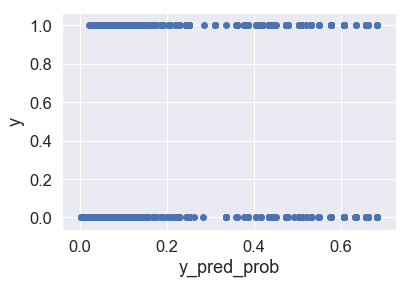

In [92]:
plt.scatter(bank.y_pred_prob, bank.y);

plt.xlabel('y_pred_prob');
plt.ylabel('y');

** Calculate a new threshold and use it to convert predicted probabilities to output classes**



In [93]:
# A:
import numpy as np
bank['y_pred_class'] = np.where(bank.y_pred_prob >= 0.25, 1, 0)

In [94]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,impute_housing,y_pred_prob,y_pred_class
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,1,0.120642,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,0,0.069512,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,1,0.084748,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0,1,0.068316,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,1,0.058805,0


**Evaluate the model metrics now**

In [95]:
# A: slightly igher accuracy than before but still lower than baseline of 89%
print((metrics.accuracy_score(bank.y_pred_class, bank.y)))

0.8912357368293276


## Step 4: Build a model using all of the features.

- Evaluate it using your prefered metrics.

In [96]:
# A: First we must fill in the unknown values reamining with the most common value of the column it is in 
#Then we must create dummies now for all of the categorical columns


In [97]:
for i in bank.columns:
    
    try:
        print( i, 'has', len(bank[bank[i] == 'unknown']), 'unknowns')
    except:
        pass

job has 39 unknowns
marital has 11 unknowns
education has 167 unknowns
default has 803 unknowns
housing has 105 unknowns
loan has 105 unknowns
contact has 0 unknowns
month has 0 unknowns
day_of_week has 0 unknowns
poutcome has 0 unknowns


C:\Users\Daniel_Heffley\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [98]:
bank.job.value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

In [99]:
bank['job'].replace('unknown', 'admin.',inplace=True)

In [100]:
bank.marital.value_counts()

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64

In [101]:
bank['marital'].replace('unknown', 'married',inplace=True)

In [102]:
bank.education.value_counts()

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64

In [103]:
bank['education'].replace('unknown', 'university.degree',inplace=True)

In [104]:
bank.default.value_counts()

no         3315
unknown     803
yes           1
Name: default, dtype: int64

In [105]:
bank['default'].replace('unknown', 'no',inplace=True)

In [106]:
bank.housing.value_counts()

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64

In [107]:
bank['housing'].replace('unknown', 'yes',inplace=True)

In [108]:
bank.loan.value_counts()

no         3349
yes         665
unknown     105
Name: loan, dtype: int64

In [109]:
bank['loan'].replace('unknown', 'no',inplace=True)

In [110]:
for i in bank.columns:
    
    try:
        print( i, 'has', len(bank[bank[i] == 'unknown']), 'unknowns')
    except:
        pass

job has 0 unknowns
marital has 0 unknowns
education has 0 unknowns
default has 0 unknowns
housing has 0 unknowns
loan has 0 unknowns
contact has 0 unknowns
month has 0 unknowns
day_of_week has 0 unknowns
poutcome has 0 unknowns


In [111]:
bank.drop(['impute_housing'], axis  = 1);

In [112]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
impute_housing      int64
y_pred_prob       float64
y_pred_class        int32
dtype: object

In [113]:
#Now we can add the dummies

to_be_dummied = ['job',                
'marital',            
'education',          
'default',            
'housing',            
'loan',               
'contact',            
'month',              
'day_of_week',
'poutcome']

for i in to_be_dummied:
    
    bank = bank.join(pd.get_dummies(bank[i], prefix=i, drop_first = True))

In [114]:
bank.drop(to_be_dummied, axis = 1,inplace = True);

In [115]:
bank.dtypes #now everything is just numbers

age                                int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                  int64
impute_housing                     int64
y_pred_prob                      float64
y_pred_class                       int32
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
marital_married 

In [132]:
#Now we can run a model on all variables
lr_all = LogisticRegression()


X = bank.drop(['y','impute_housing','y_pred_prob','y_pred_class'], axis =1)
y = bank.y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = .3)

lr_all.fit(X_train,y_train)
y_pred = lr_all.predict(X_test)

C:\Users\Daniel_Heffley\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [133]:
print((metrics.accuracy_score(y_pred, y_test)))

0.906957928802589


In [134]:
unique, counts = np.unique(y_pred, return_counts=True)

print(np.asarray((unique, counts)).T) #The accuracy went up from the previous tests and it precicts ones and zeroes! 2% higher than baseline accuracy

[[   0 1148]
 [   1   88]]


## Bonus: Use Regularization to optimize your model.

In [127]:
# try using a for loop to test various regularization strengths 'C'
lr_all_c = LogisticRegression(C = .1)


X = bank.drop(['y','impute_housing','y_pred_prob','y_pred_class'], axis =1)
y = bank.y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = .3)

lr_all_c.fit(X_train,y_train)
y_pred = lr_all.predict(X_test)

print((metrics.accuracy_score(y_pred, y_test)))

0.9085760517799353


C:\Users\Daniel_Heffley\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
